In [ ]:
#Q2-(A)
#import all the necessary libraries
import pandas as pd
import statsmodels.api as sm
from ISLP import load_data

#Load the dataset of Bikeshare
bikeshare_df = load_data('Bikeshare')

#Define predictor (temp) and response (bikers)
X = bikeshare_df['temp']
y = bikeshare_df['bikers']   

#Add a constant for the intercept
X = sm.add_constant(X)

#Fit the simple linear regression model
model = sm.OLS(y, X).fit()

#Print the summary of regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 bikers   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     2210.
Date:                Wed, 01 Oct 2025   Prob (F-statistic):               0.00
Time:                        14:42:07   Log-Likelihood:                -53611.
No. Observations:                8645   AIC:                         1.072e+05
Df Residuals:                    8643   BIC:                         1.072e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3745      3.423     -1.570      0.1

#Q2-(B)

-In my regression model predictor - independent variable is temp and response - dependent variable is bikers.
-The coefficient for temp is 305.0, which means that for every unit increase in normalized temperature, the number of bikers increases by about 305 on average.
-The slope has a t = 47.0 with a p-value < 0.001, which is far below any reasonable significance level (e.g., 0.05). This allows us to reject the null hypothesis 
H0 :β1 = 0
-The 95% confidence interval for the slope is [292.3, 317.7], which does not include 0. This reinforces that the effect is statistically significant.
-The overall model F-statistic is 2210 (p < 0.001), confirming that temperature has significant explanatory power for bike rentals.
-Although the R-squared is 0.204 (so temp explains ~20% of variation), the effect itself is highly significant due to the large sample size (8645 observations) and strong slope.
-Therefore in conclusion we can deduce that there is statistically significant positive association between temperature and number of bikers — higher temperatures are strongly linked to more bike rentals (directly proportional).
 

#Q2-(C)

The R² value from the model is about 0.204, which means temperature explains around 20% of the variation in bike rentals. This shows that there is a real, meaningful connection between temperature and the number of bikers warmer days generally bring more riders. At the same time, since 80% of the variation is left unexplained, it also tells us that other factors like weather, season, or day of the week play a big role too. So, the relationship is statistically significant but only moderately strong in practice.

Q2-(D)

The relationship between the predictor (temperature) and the response (bikers) is positive. We can tell this because the slope coefficient for temp is 305.0, which is greater than zero. A positive slope means that as temperature increases, the predicted number of bikers also increases. In other words, warmer days are associated with more people renting bikes.

#Q2-(E)

We know that according to the regression model the predicted number of bikers is given as: 
y ​= −5.3745 + 305.006 * temp

But the minimum value od temperature in the dataset is = 0 therefore 
y = -5.3745 + 305.006 * 0 ==> -5.3745 
which is approximately -5

So we got y = -5 but the negative number number of bikers is not realistic, so in practical terms this means the model predicts essentially zero bikers on the coldest days.


#Q2-(F)

It would be inappropriate to use this model to estimate the number of bikers on the coldest day because the regression predicts a negative value (about –5), which has no real meaning since the number of riders cannot be less than zero. This happens because the model is a simple linear regression, which assumes the same straight-line relationship holds for all temperatures, even at extreme values. In reality, bike rentals at very low temperatures are likely influenced by other factors (such as snow, holidays, or safety), so the linear model does not capture behavior well at the minimum temperature.

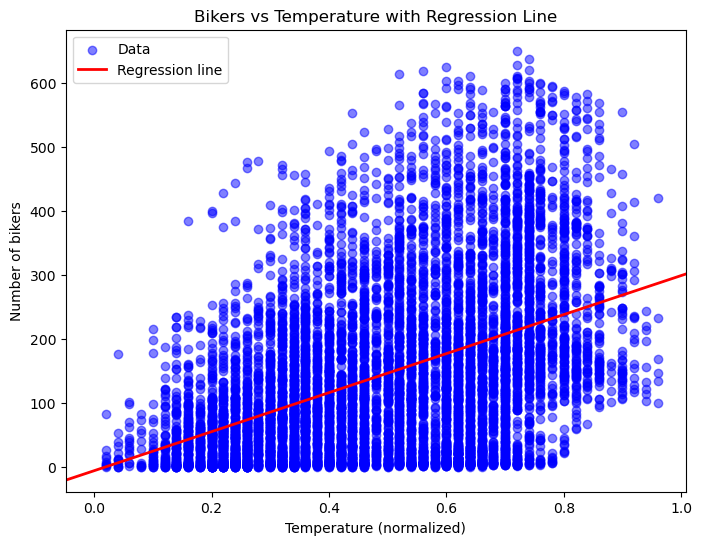

In [ ]:
#Q2-(G)
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8,6))

# Scatterplot
ax.scatter(bikeshare_df['temp'], bikeshare_df['bikers'], 
           alpha=0.5, color='blue', label="Data")

# Ploting the regression line using ax.axline (
intercept = model.params['const']
slope = model.params['temp']

ax.axline((0, intercept), slope=slope, color='red', linewidth=2, label="Regression line")

# Labels and title
ax.set_xlabel("Temperature (normalized)")
ax.set_ylabel("Number of bikers")
ax.set_title("Bikers vs Temperature with Regression Line")
ax.legend()

plt.show()


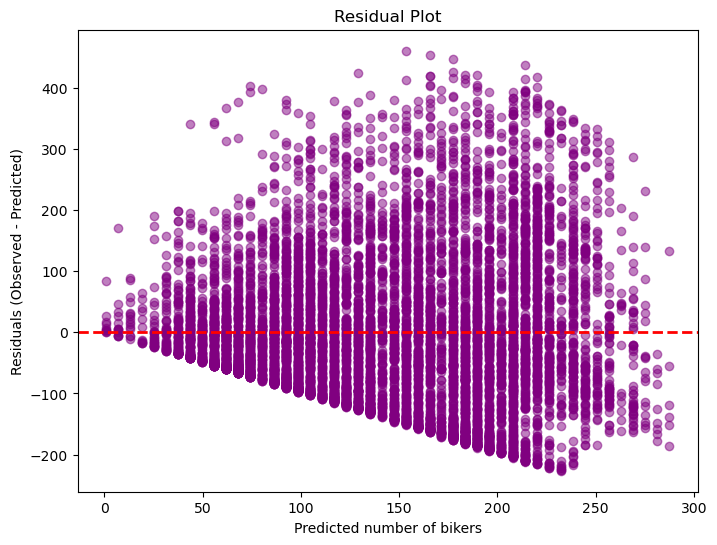

In [ ]:
#Q2-(H)

import matplotlib.pyplot as plt

#predicted number of bikers from the model
y_pred = model.predict(X)
residuals = y - y_pred

#create the plot
fig, ax = plt.subplots(figsize=(8,6))

#Plot each prediction vs. its error
ax.scatter(y_pred, residuals, alpha=0.5, color="purple")

#Add a line at 0 to show where the errors would be if predictions were perfect
ax.axhline(0, color="red", linestyle="--", linewidth=2)

#Add labels and a title 
ax.set_xlabel("Predicted number of bikers")
ax.set_ylabel("Residuals (Observed - Predicted)")
ax.set_title("Residual Plot")

plt.show()


In [17]:
#Q3-(A)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data

# Load all the data data
df = load_data('Bikeshare')

# Ensure hr is numeric 
df['hr'] = pd.to_numeric(df['hr'], errors='coerce')

y = df['bikers']

# Select numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns

corr_matrix = df[num_cols].corr(method='pearson')
print(corr_matrix)

#print it properly
print(df[['bikers','hr','temp','workingday','atemp','hum','windspeed']].corr())


              season       day        hr   holiday   weekday  workingday  \
season      1.000000  0.825218 -0.012179 -0.001116 -0.013639    0.013763   
day         0.825218  1.000000 -0.011560  0.030972  0.010990    0.003277   
hr         -0.012179 -0.011560  1.000000 -0.000929 -0.005618    0.003792   
holiday    -0.001116  0.030972 -0.000929  1.000000 -0.076324   -0.247934   
weekday    -0.013639  0.010990 -0.005618 -0.076324  1.000000    0.018572   
workingday  0.013763  0.003277  0.003792 -0.247934  0.018572    1.000000   
temp        0.343535  0.261316  0.120548 -0.020059 -0.038969    0.053405   
atemp       0.351910  0.273091  0.116382 -0.026915 -0.042439    0.052551   
hum         0.191793  0.189453 -0.251188 -0.022895 -0.051307    0.025305   
windspeed  -0.154735 -0.154169  0.125153  0.000502  0.039586    0.010509   
casual      0.141894  0.090982  0.303720  0.052906 -0.013475   -0.324750   
registered  0.220666  0.185044  0.390313 -0.046779 -0.000500    0.129540   
bikers      

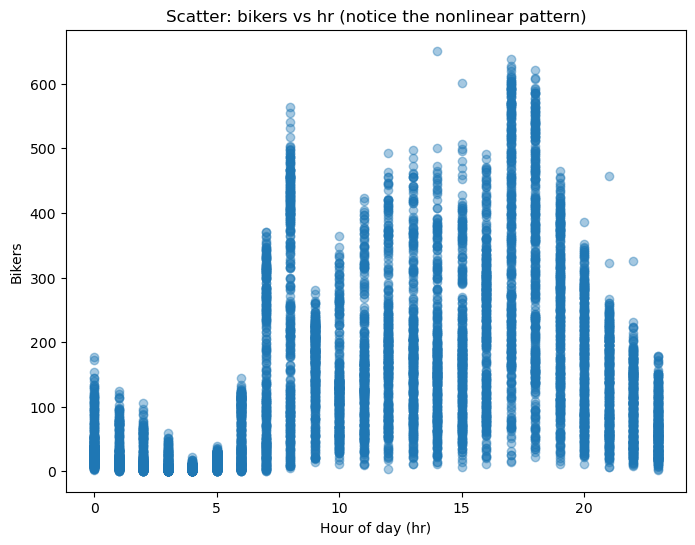

In [18]:
#Q2-(B)
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(df['hr'], df['bikers'], alpha=0.4)
ax.set_xlabel('Hour of day (hr)')
ax.set_ylabel('Bikers')
ax.set_title('Scatter: bikers vs hr (notice the nonlinear pattern)')
plt.show()


In [19]:
#Q3-(C)
X_c = sm.add_constant(df[['hr']])   # intercept + hr
model_c = sm.OLS(y, X_c).fit()
print(model_c.summary())

# MSE = mean squared error on training set
yhat_c = model_c.predict(X_c)
mse_c = np.mean((y - yhat_c)**2)
print("MSE (model c):", mse_c)


                            OLS Regression Results                            
Dep. Variable:                 bikers   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     1721.
Date:                Wed, 01 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:12:45   Log-Likelihood:                -53810.
No. Observations:                8645   AIC:                         1.076e+05
Df Residuals:                    8643   BIC:                         1.076e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.4482      2.564     20.453      0.0

In [20]:
#Q3-(D)
df['hr2'] = df['hr']**2

X_d = sm.add_constant(df[['hr','hr2']])
model_d = sm.OLS(y, X_d).fit()
print(model_d.summary())

yhat_d = model_d.predict(X_d)
mse_d = np.mean((y - yhat_d)**2)
print("MSE (model d):", mse_d)


                            OLS Regression Results                            
Dep. Variable:                 bikers   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     1898.
Date:                Wed, 01 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:12:55   Log-Likelihood:                -53021.
No. Observations:                8645   AIC:                         1.060e+05
Df Residuals:                    8642   BIC:                         1.061e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -46.4378      3.336    -13.918      0.0

In [21]:
#Q3-(E)
# workingday is 0/1; create interaction
df['hr_working'] = df['hr'] * df['workingday']

X_e = sm.add_constant(df[['hr','hr2','workingday','hr_working']])
model_e = sm.OLS(y, X_e).fit()
print(model_e.summary())

yhat_e = model_e.predict(X_e)
mse_e = np.mean((y - yhat_e)**2)
print("MSE (model e):", mse_e)


                            OLS Regression Results                            
Dep. Variable:                 bikers   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     950.8
Date:                Wed, 01 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:12:58   Log-Likelihood:                -53018.
No. Observations:                8645   AIC:                         1.060e+05
Df Residuals:                    8640   BIC:                         1.061e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.9017      4.777     -8.771      0.0

In [22]:
#Q3-(F)
X_f = sm.add_constant(df[['hr','hr2','workingday','hr_working','temp']])
model_f = sm.OLS(y, X_f).fit()
print(model_f.summary())

yhat_f = model_f.predict(X_f)
mse_f = np.mean((y - yhat_f)**2)
print("MSE (model f):", mse_f)


                            OLS Regression Results                            
Dep. Variable:                 bikers   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     1362.
Date:                Wed, 01 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:13:08   Log-Likelihood:                -52083.
No. Observations:                8645   AIC:                         1.042e+05
Df Residuals:                    8639   BIC:                         1.042e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -139.8046      4.793    -29.170      0.0

#Q3-(G)
-Training MSE will never increase when you add predictors in OLS and it decreases or stays the same because the model can fit the training data at least as well as before.
-But this can lead to overfitting capturing noise instead of signal so the test MSE can get worse even as training MSE improves.

#Q3-(H)

Out of the models we tried, I would expect the model in part (f) to perform the best on unseen 2013 data. This is because it captures the clear nonlinear pattern of bike usage over the hours of the day (by including both hr and hr²), accounts for the difference between weekdays and weekends through the workingday variable and its interaction with hr, and also includes temperature, which we already know is an important factor from question (2). The simpler models in earlier parts leave out these important patterns and would underfit, while adding too many extra predictors could cause overfitting. Model (f) strikes a good balance, so it should give the best performance when tested on new data.